In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\shivangi\\OneDrive\\Desktop\\task1\\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# summary statistics
print(df.describe())

print(df.describe(include='object'))  


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Cabin Embarked
count                   

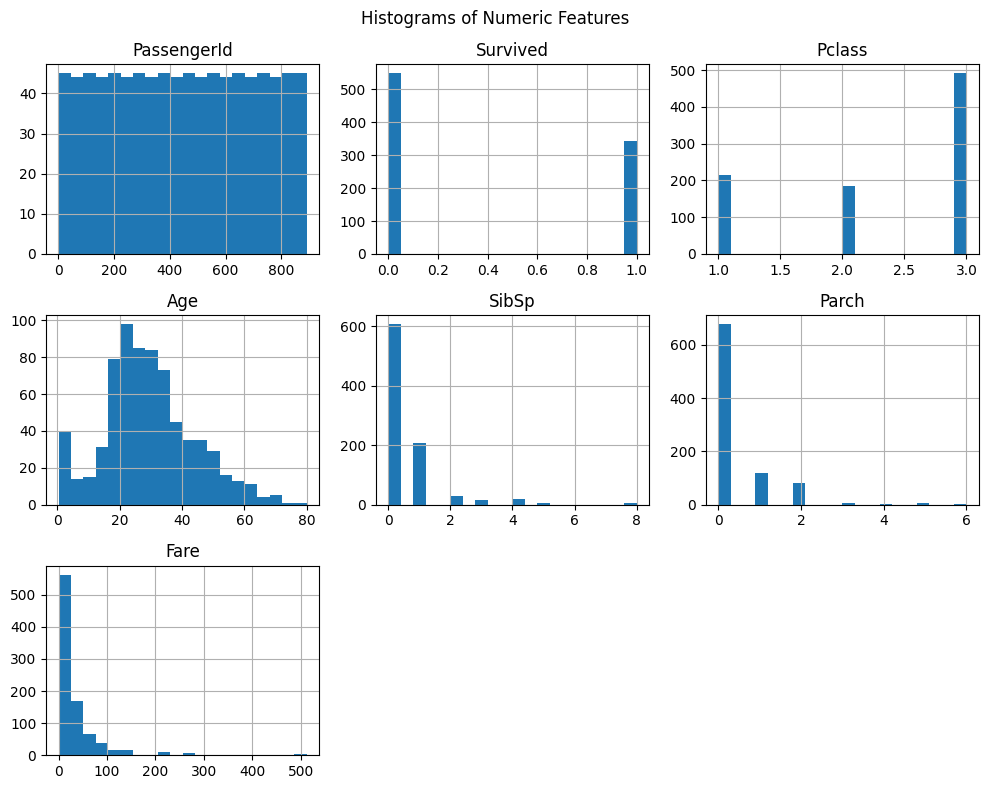

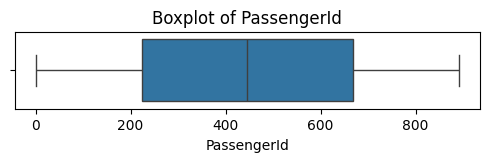

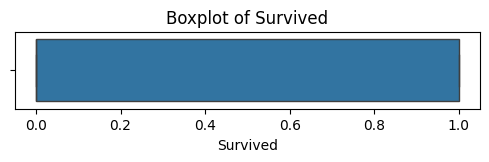

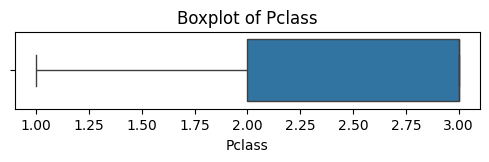

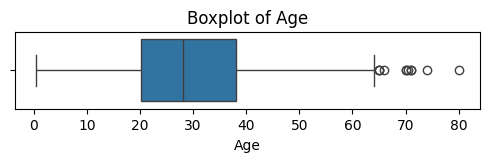

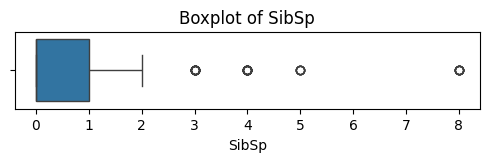

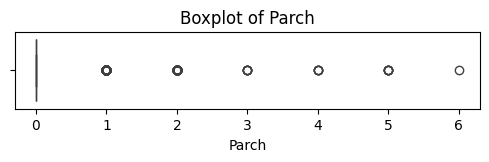

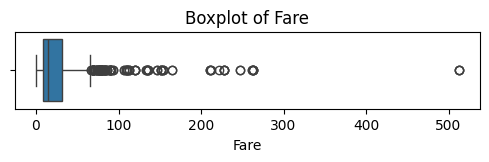

In [8]:
# Histograms
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


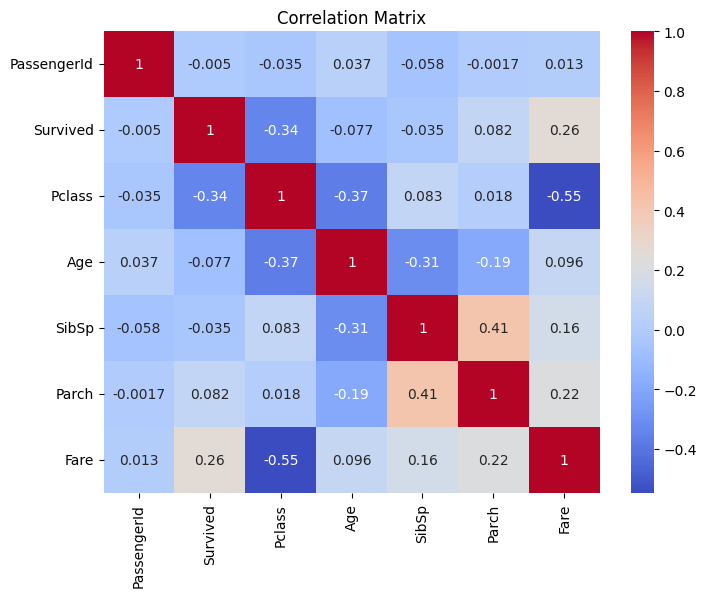

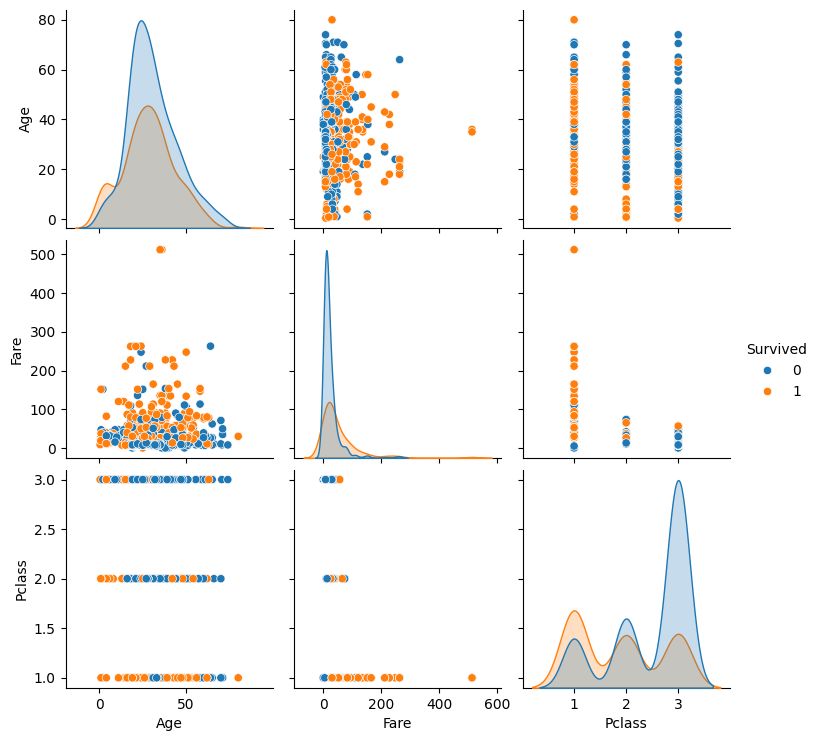

In [20]:
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot 
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.show()


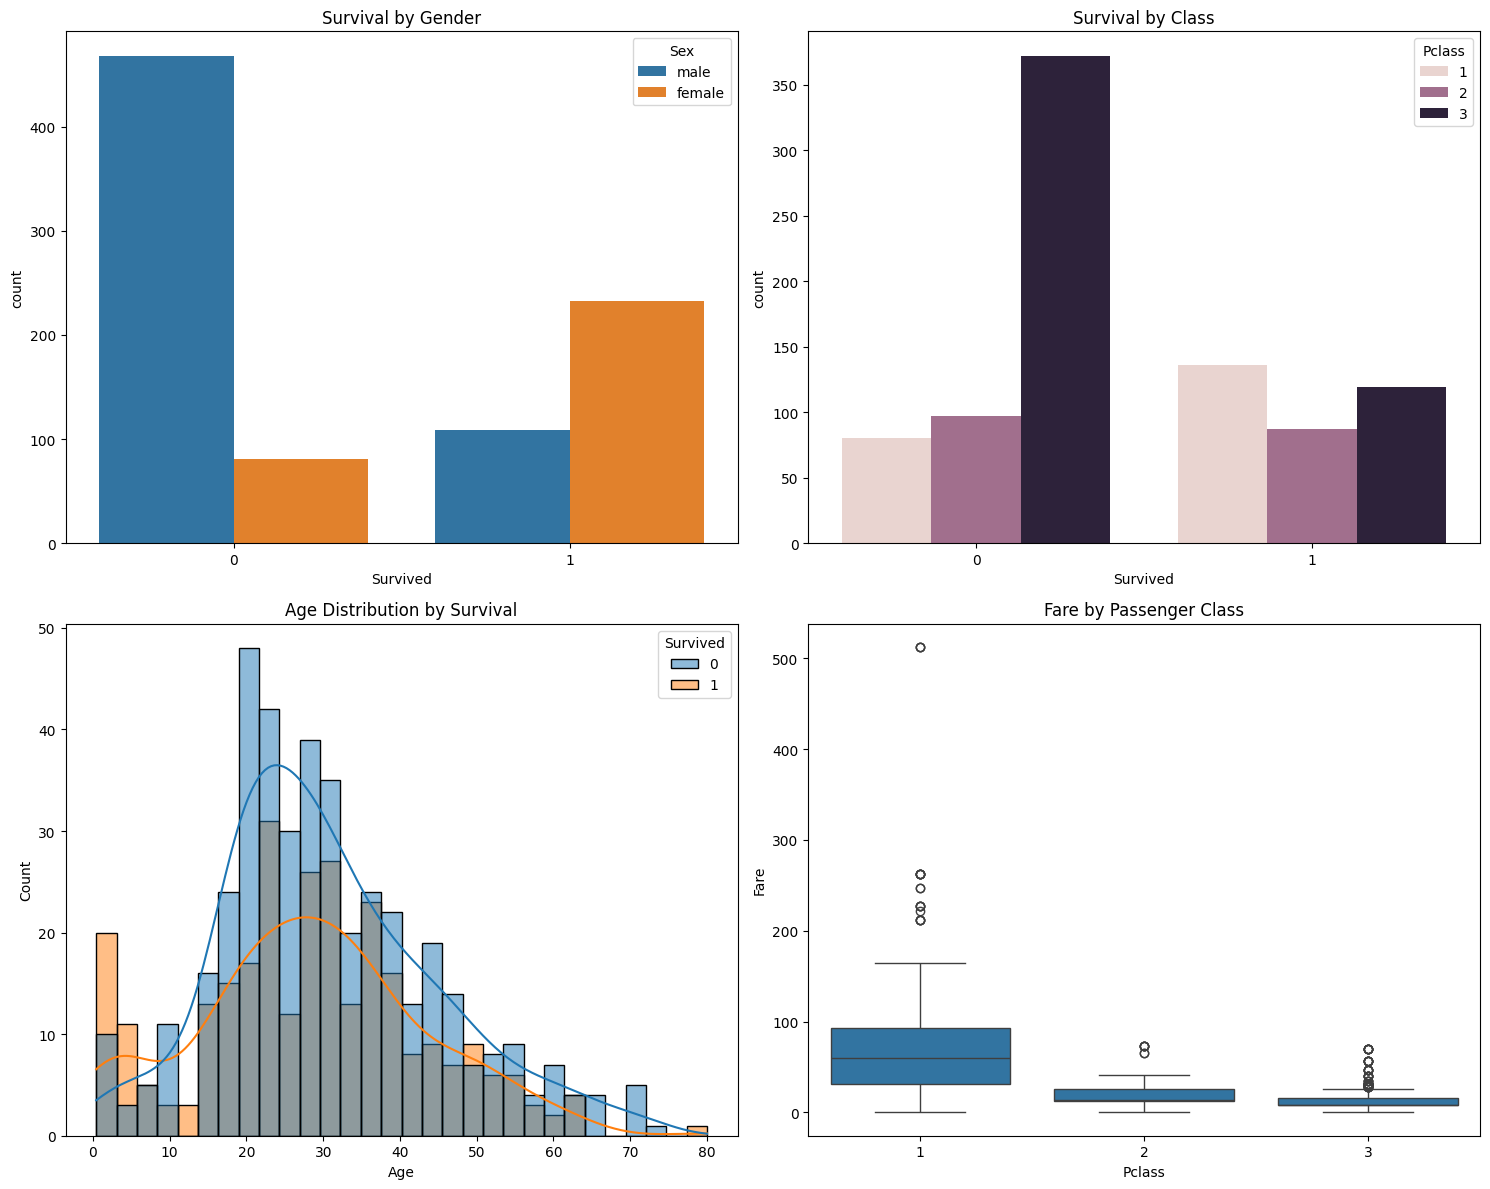

High Fare Anomalies (Fare > 300):
                                   Name      Fare  Pclass  Survived
258                    Ward, Miss. Anna  512.3292       1         1
679  Cardeza, Mr. Thomas Drake Martinez  512.3292       1         1
737              Lesurer, Mr. Gustave J  512.3292       1         1
Unusual Age Passengers (Age > 70):
                                     Name   Age  Pclass  Survived
96              Goldschmidt, Mr. George B  71.0       1         0
116                  Connors, Mr. Patrick  70.5       3         0
493               Artagaveytia, Mr. Ramon  71.0       1         0
630  Barkworth, Mr. Algernon Henry Wilson  80.0       1         1
851                   Svensson, Mr. Johan  74.0       3         0


In [24]:
# Patterns & Trends
plt.figure(figsize=(15,12))

# 1. Survival Rate by Gender
plt.subplot(2,2,1)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')

# 2. Survival Rate by Class
plt.subplot(2,2,2)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')

# 3. Age Distribution vs Survival
plt.subplot(2,2,3)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')

# 4. Fare vs Class (detect outliers)
plt.subplot(2,2,4)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')

plt.tight_layout()
plt.show()

# Anomalies
print("High Fare Anomalies (Fare > 300):")
print(df[df['Fare'] > 300][['Name', 'Fare', 'Pclass', 'Survived']])

print("Unusual Age Passengers (Age > 70):")
print(df[df['Age'] > 70][['Name', 'Age', 'Pclass', 'Survived']])


In [26]:
# Feature-level Inference
print("\n📌 Feature-Level Inference from Visuals:")
print("""1. Gender: Females had a significantly higher survival rate than males.
2. Class: Passengers in 1st class were more likely to survive; 3rd class had the lowest survival rate.
3. Age: Most survivors were between 20 and 40 years old. Children also had a higher survival chance.
4. Fare: High fare passengers (especially in 1st class) survived more; a few paid extremely high fares, marking outliers.
5. Anomalies: Very old passengers (> 70) and high fare individuals (> $300) were rare but noteworthy.
""")


📌 Feature-Level Inference from Visuals:
1. Gender: Females had a significantly higher survival rate than males.
2. Class: Passengers in 1st class were more likely to survive; 3rd class had the lowest survival rate.
3. Age: Most survivors were between 20 and 40 years old. Children also had a higher survival chance.
4. Fare: High fare passengers (especially in 1st class) survived more; a few paid extremely high fares, marking outliers.
5. Anomalies: Very old passengers (> 70) and high fare individuals (> $300) were rare but noteworthy.

